In [1]:
import datetime
import numpy
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow
import keras
from tensorflow.keras.callbacks import EarlyStopping

d:\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
d:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
d:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
source_file = '../../../../PrevisaoVento/Data/process/cenario1/dados_cenario1.csv'
dataframe = pd.read_csv(source_file, delimiter=';', index_col=0, parse_dates=['Data'])

In [3]:
dataframe.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Longitude      8760 non-null   float64       
 1   Latitude       8760 non-null   float64       
 2   VentoPrevisto  8760 non-null   float64       
 3   Direcao        8760 non-null   float64       
 4   Data           8760 non-null   datetime64[ns]
 5   Pressao        8760 non-null   float64       
 6   Temperatura    8760 non-null   float64       
 7   Chuva          8760 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 615.9 KB


In [4]:
#df_day = dataframe[['Data', 'VentoPrevisto', 'Chuva', 'Pressao','Temperatura','Direcao']].groupby('Data').mean()
df_day = dataframe.set_index('Data')
df_day.head(2)

,Longitude,Latitude,VentoPrevisto,Direcao,Pressao,Temperatura,Chuva
Data,,,,,,,
2017-01-01 00:00:00,-42.75,-14.25,6.82,97.36,1013.14,25.93,0.0
2017-01-01 01:00:00,-42.75,-14.25,6.91,94.65,1013.34,25.73,0.0


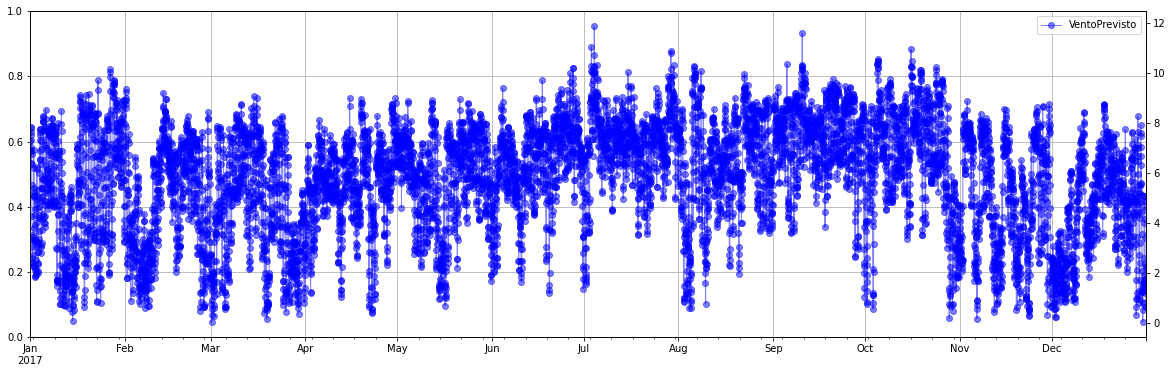

In [5]:
fig = pyplot.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
_ = df_day.plot(y='VentoPrevisto', ax=ax2, lw=1, marker='o', color='blue', alpha=0.5)
#_ = df_day.plot(y='Temperatura', ax=ax, lw=1, marker='o', color='red', alpha=0.75)
_ = ax.grid()

In [6]:
df_day['V_d1'] = df_day['VentoPrevisto'].shift(-1)
df_day['V_l1'] = df_day['VentoPrevisto'].shift(1)
df_day['V_l2'] = df_day['VentoPrevisto'].shift(2)
df_day['V_l3'] = df_day['VentoPrevisto'].shift(3)
df_day['V_l4'] = df_day['VentoPrevisto'].shift(4)
df_day['V_l5'] = df_day['VentoPrevisto'].shift(5)
df_day['V_l6'] = df_day['VentoPrevisto'].shift(6)
df_day['V_l7'] = df_day['VentoPrevisto'].shift(7)

df_day['C_l1'] = df_day['Chuva'].shift(1)
df_day['C_l2'] = df_day['Chuva'].shift(2)
df_day['C_l3'] = df_day['Chuva'].shift(3)
df_day['C_l4'] = df_day['Chuva'].shift(4)
df_day['C_l5'] = df_day['Chuva'].shift(5)
df_day['C_l6'] = df_day['Chuva'].shift(6)
df_day['C_l7'] = df_day['Chuva'].shift(7)

df_day['D_l1'] = df_day['Direcao'].shift(1)
df_day['D_l2'] = df_day['Direcao'].shift(2)
df_day['D_l3'] = df_day['Direcao'].shift(3)
df_day['D_l4'] = df_day['Direcao'].shift(4)
df_day['D_l5'] = df_day['Direcao'].shift(5)
df_day['D_l6'] = df_day['Direcao'].shift(6)
df_day['D_l7'] = df_day['Direcao'].shift(7)

df_day['P_l1'] = df_day['Pressao'].shift(1)
df_day['P_l2'] = df_day['Pressao'].shift(2)
df_day['P_l3'] = df_day['Pressao'].shift(3)
df_day['P_l4'] = df_day['Pressao'].shift(4)
df_day['P_l5'] = df_day['Pressao'].shift(5)
df_day['P_l6'] = df_day['Pressao'].shift(6)
df_day['P_l7'] = df_day['Pressao'].shift(7)

df_day['T_l1'] = df_day['Temperatura'].shift(1)
df_day['T_l2'] = df_day['Temperatura'].shift(2)
df_day['T_l3'] = df_day['Temperatura'].shift(3)
df_day['T_l4'] = df_day['Temperatura'].shift(4)
df_day['T_l5'] = df_day['Temperatura'].shift(5)
df_day['T_l6'] = df_day['Temperatura'].shift(6)
df_day['T_l7'] = df_day['Temperatura'].shift(7)

complete_cases = ~df_day.isna().any(axis=1)
dfn = df_day[complete_cases]

In [7]:
dfn.head()

,Longitude,Latitude,VentoPrevisto,Direcao,Pressao,Temperatura,Chuva,V_d1,V_l1,V_l2,...,P_l5,P_l6,P_l7,T_l1,T_l2,T_l3,T_l4,T_l5,T_l6,T_l7
Data,,,,,,,,,,,,,,,,,,,,,
2017-01-01 07:00:00,-42.75,-14.25,7.30,98.60,1013.67,20.49,0.0,7.03,7.51,7.63,...,1013.04,1013.34,1013.14,20.98,21.54,22.97,23.67,25.50,25.73,25.93
2017-01-01 08:00:00,-42.75,-14.25,7.03,97.60,1014.05,20.21,0.0,6.90,7.30,7.51,...,1012.92,1013.04,1013.34,20.49,20.98,21.54,22.97,23.67,25.50,25.73
2017-01-01 09:00:00,-42.75,-14.25,6.90,98.42,1014.79,20.17,0.0,6.40,7.03,7.30,...,1013.07,1012.92,1013.04,20.21,20.49,20.98,21.54,22.97,23.67,25.50
2017-01-01 10:00:00,-42.75,-14.25,6.40,97.18,1015.33,25.67,0.0,6.77,6.90,7.03,...,1013.34,1013.07,1012.92,20.17,20.21,20.49,20.98,21.54,22.97,23.67
2017-01-01 11:00:00,-42.75,-14.25,6.77,95.62,1015.49,25.87,0.0,6.35,6.40,6.90,...,1013.39,1013.34,1013.07,25.67,20.17,20.21,20.49,20.98,21.54,22.97


In [8]:
data_atual = datetime.datetime.now()
print(data_atual)

2021-09-28 09:25:37.939904


In [9]:
# TRAINING
# TRAINING
n_test_samples = 720
n_validation_samples = 720
random_seed = 720

#n_test_samples = 30
#n_validation_samples = 30
#random_seed = 32

# SET THE RANDOM SEED
numpy.random.seed(random_seed)
tensorflow.random.set_seed(random_seed)

x_cols = ['VentoPrevisto', 'V_l1','V_l2','V_l3','V_l4','V_l5','V_l6','V_l7',  'C_l1','C_l2','C_l3','C_l4','C_l5','C_l6','C_l7',  'D_l1','D_l2','D_l3','D_l4','D_l5','D_l6','D_l7',  'P_l1','P_l2','P_l3','P_l4','P_l5','P_l6','P_l7', 'T_l1','T_l2','T_l3','T_l4','T_l5','T_l6','T_l7']
y_cols = ['V_d1']

# SAMPLING
X_trn = dfn.iloc[:-(n_validation_samples + n_test_samples)][x_cols].to_numpy()
X_val = dfn.iloc[-(n_validation_samples + n_test_samples):-n_test_samples][x_cols].to_numpy()
X_tst = dfn[x_cols].to_numpy()
Y_trn = dfn.iloc[:-(n_validation_samples + n_test_samples)][y_cols].to_numpy()
Y_val = dfn.iloc[-(n_validation_samples + n_test_samples):-n_test_samples][y_cols].to_numpy()

# SCALING X
X_scaler = StandardScaler()
X_scaler = X_scaler.fit(X_trn)
X_trn_scaled = X_scaler.transform(X_trn)
X_val_scaled = X_scaler.transform(X_val)
X_tst_scaled = X_scaler.transform(X_tst)

# SCALING Y
Y_scaler = StandardScaler()
Y_scaler = Y_scaler.fit(Y_trn)
Y_trn_scaled = Y_scaler.transform(Y_trn)
Y_val_scaled = Y_scaler.transform(Y_val)

# DECLARE NET
max_neurons = 10
PATIENCE = 250
MAX_EPOCHS = 10*PATIENCE
LEARNING_RATE = 0.01
HIDDEN_ACTIVATION = 'tanh'
MODEL_LOSS = 'val_loss'
MIN_IMPROVEMENT = 0.025

best_loss = 1000.0
best_val_loss = 1000.0
training_result_list = []
for n_neurons in numpy.arange(max_neurons) + 1:
    
    inputs = keras.Input(shape=(X_trn_scaled.shape[1]))  # Define input (features) layer
    hidden = keras.layers.Dense(n_neurons, activation=HIDDEN_ACTIVATION)(inputs) # Define first dense layer , use_bias=True
    outputs = keras.layers.Dense(Y_trn_scaled.shape[1], activation='linear')(hidden) #'linear'
    
    #ativacoes: sigmoid (Sigmoide)*, tanh (Tangente Hiperbólica) *, relu (Unidade Linear Retificada) *, elu **(Unidade Linear Exponencial).
    #           softmax*, selu*, softsign , exponential
    # use_bias:True  >> tf.keras.layers.Dense(units,activation=None,use_bias=True,
        
    model_name = 'FORECAST_{}_{}'.format(HIDDEN_ACTIVATION, n_neurons)
    my_net = keras.Model(inputs=inputs, outputs=outputs, name=model_name)
    
    
    
    # Metric values are displayed during fit() and logged to the History object returned by fit(). 
    # They are also returned by model.evaluate().
    
    otimizacao = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    # Outra>> otimizacao = keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=0.9)
    # Outra>> otimizacao = tf.keras.optimizers.RMSprop(learning_rate=LEARNING_RATE, momentum=0.9)
    # Outra>>  backup -- my_net.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='mse')
    # categorical_crossentropy
    my_net.compile(optimizer = otimizacao, loss='mse')
   
    
    # 1) validation_data: tupla (x_val, y_val) na qual avaliar a PERDA e quaisquer métricas de modelo no final de cada época. 
    # 2) LOSS = No aprendizado profundo, a perda(loss) é o valor que uma rede neural está tentando minimizar: 
    #   é a distância entre a verdade fundamental e as previsões. Não se usa Acuracia (acc e val_acc) para problemas de Regressão, só Classificação
    es_callback = EarlyStopping(monitor='val_loss', mode='min', patience=PATIENCE, restore_best_weights=True)
    
    
    # Um objeto `History`. Seu atributo `History.history` é um registro de valores de perda de treinamento e valores de métricas
    #  em épocas sucessivas, bem como valores de perda de validação e valores de métricas de validação
    history = my_net.fit(X_trn_scaled, Y_trn_scaled, epochs=MAX_EPOCHS, validation_data=(X_val_scaled, Y_val_scaled), batch_size=X_trn_scaled.shape[0], callbacks=[es_callback], verbose=0)
    
    
    model_loss = history.history['loss'][-1]
    model_val_loss = history.history['val_loss'][-1]
    epochs = len(history.history['val_loss'])

    has_improved_val_loss = False
    loss_improvement = 1.0 - model_val_loss/best_val_loss

    if loss_improvement >= MIN_IMPROVEMENT:
        is_best_net = ((model_loss <= best_loss) & (model_val_loss < best_val_loss))

        if is_best_net:
                best_loss = model_loss
                best_val_loss = model_val_loss
                best_net = my_net
                best_history = history
                best_text = '***BEST NET!***'
                improvement_text = '{:.0f}% GAIN'.format(100.0*loss_improvement)
                best_name = model_name
                best_epochs = epochs
        else:
            best_text = ''
            improvement_text = ''
    else:
        print('EXTRA NEURON DIDNT IMPROVE NET {:.0f}% GAIN'.format(100.0*loss_improvement))
        break
    
    result_dict = {'model_name': model_name, 'epochs': epochs, 'model_loss': model_loss, 'model_val_loss': model_val_loss, 'best_net':is_best_net}
    
    
    training_result_list.append(result_dict)
    print('{} RESULTS > EPOCHS: {} LOSS: {:.3f} VAL_LOSS: {:.3f} {} {}'.format(model_name, epochs, model_loss, model_val_loss, best_text, improvement_text)) 

FORECAST_tanh_1 RESULTS > EPOCHS: 1199 LOSS: 0.049 VAL_LOSS: 0.059 ***BEST NET!*** 100% GAIN
EXTRA NEURON DIDNT IMPROVE NET -1% GAIN


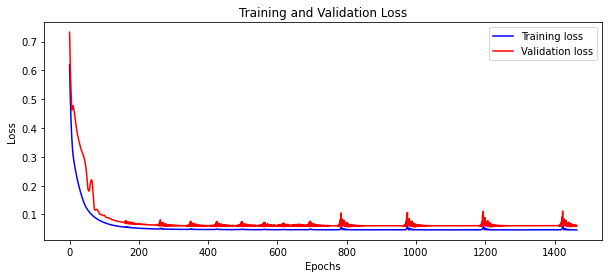

In [10]:
from matplotlib import pyplot as plt

def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure(figsize=(10, 4))
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
   

visualize_loss(history, "Training and Validation Loss")

### 3. Executa a Predição

In [11]:
# X_tst_scaled = [[1.665,1.9,1.41,1.558,1.124,1.842,1.118,1.342,0.0,0.0,0.0,0.01,0.01,0.0,0.0,109.83,114.02,110.68,109.82,106.75,103.42,110.65,884.0,884.0,884.5,885.5,886.0,886.0,886.0,21.567,21.033,20.4,19.85,19.084,18.516,17.2]]
# X_tst_scaled = [[7.665,6.9,7.41,7.558,8.124,10.842,11.118,11.342,0.0,0.0,0.0,0.01,0.01,0.0,0.0,109.83,114.02,110.68,109.82,106.75,103.42,110.65,884.0,884.0,884.5,885.5,886.0,886.0,886.0,21.567,21.033,20.4,19.85,19.084,18.516,17.2]]

Y_est_scaled = best_net.predict(X_tst_scaled)
Y_est = Y_scaler.inverse_transform(Y_est_scaled)

df_day.loc[complete_cases, ['Y_est']] = numpy.around(Y_est,3)
df_day['residual'] = df_day['Y_est'] - df_day['V_d1']
df_day['rabs'] = df_day['residual'].abs()


model_r2_score = r2_score(df_day.loc[complete_cases, 'V_d1'].to_numpy(), df_day.loc[complete_cases, 'Y_est'].to_numpy())


In [13]:
data_atual = datetime.datetime.now()
print(data_atual)

2021-09-28 09:31:59.041635


### 4. Exporta o modelo da RNA FeedFoward e Scaler do X e Y

In [24]:
import pickle

#  print(pickle.format_version)  
#  : Versão 4.0

# EXPORTA MODELO PICKLE
model_file = '../../../../PrevisaoVento/Code/Model/ScalerX_previsao.jbl'
with open(model_file, 'wb') as fid:
    pickle.dump(X_scaler, fid)
    
model_file = '../../../../PrevisaoVento/Code/Model/ScalerY_previsao.jbl'
with open(model_file, 'wb') as fid:
    pickle.dump(Y_scaler, fid)

    

# IMPORTA MODELO PICKLE  
# with open(model_file, 'rb') as fid:
    # scaler_models = pickle.load(fid)
    
#variavelScalizada = scaler_models[Array_Entrada]

In [25]:
from keras.models import load_model

# ** EXPOTACAO DO MODELO
model_file = '../../../../PrevisaoVento/Code/Model/modeloFinal_Tangente_previsao.pkl'
tensorflow.keras.models.save_model(best_net, model_file)

# ** IMPORTACAO DO MODELO
# modelRNA = load_model(model_file)

# modelRNA.predict(variavelScalizada)

#outro comando
#best_net.save(model_file)


INFO:tensorflow:Assets written to: ../../../../PrevisaoVento/Code/Model/modeloFinal_Tangente_previsao.pkl\assets


### 5. Plota o grafico para dados do ano de 2017

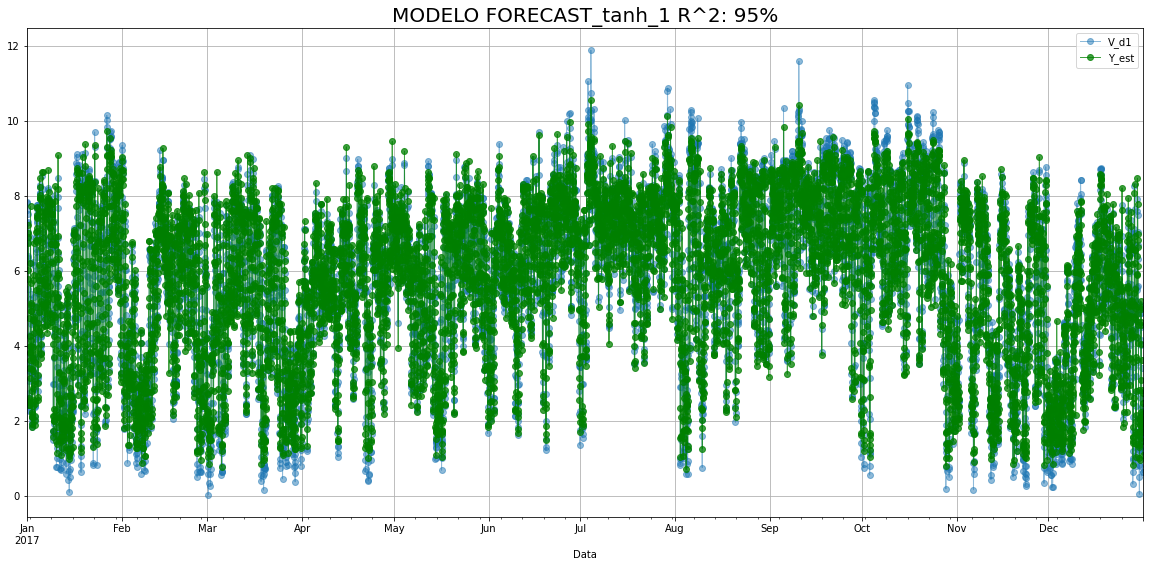

In [19]:
fig = pyplot.figure(figsize=(20, 9))
ax = fig.add_subplot(111)
_ = df_day.plot(y='V_d1', ax=ax, lw=1, marker='o', alpha=0.5)
_ = df_day.plot(y='Y_est', ax=ax, lw=1, marker='o', alpha=0.75, color='green')
_ = ax.grid()
_ = ax.set_title('MODELO {} R^2: {:.0f}%'.format(best_name, 100.0*model_r2_score), size=20)

### 6. Visão dos 2 ultimos registros

In [20]:
df_day.tail(5)

,Longitude,Latitude,VentoPrevisto,Direcao,Pressao,Temperatura,Chuva,V_d1,V_l1,V_l2,...,T_l1,T_l2,T_l3,T_l4,T_l5,T_l6,T_l7,Y_est,residual,rabs
Data,,,,,,,,,,,,,,,,,,,,,
2017-12-31 19:00:00,-42.75,-14.25,1.79,92.88,1010.20,32.56,0.01,2.26,1.56,1.32,...,32.38,32.45,31.76,32.05,27.98,27.85,27.46,2.186,-0.074,0.074
2017-12-31 20:00:00,-42.75,-14.25,2.26,86.13,1009.77,32.50,0.05,2.19,1.79,1.56,...,32.56,32.38,32.45,31.76,32.05,27.98,27.85,2.735,0.545,0.545
2017-12-31 21:00:00,-42.75,-14.25,2.19,86.79,1010.32,29.74,0.00,0.62,2.26,1.79,...,32.50,32.56,32.38,32.45,31.76,32.05,27.98,2.475,1.855,1.855
2017-12-31 22:00:00,-42.75,-14.25,0.62,105.53,1010.82,27.67,0.00,0.64,2.19,2.26,...,29.74,32.50,32.56,32.38,32.45,31.76,32.05,1.083,0.443,0.443
2017-12-31 23:00:00,-42.75,-14.25,0.64,123.90,1011.84,29.09,0.00,NaN,0.62,2.19,...,27.67,29.74,32.50,32.56,32.38,32.45,31.76,NaN,NaN,NaN


### 7. Extração de um trecho do grafico da predição serie temporal - Agosto

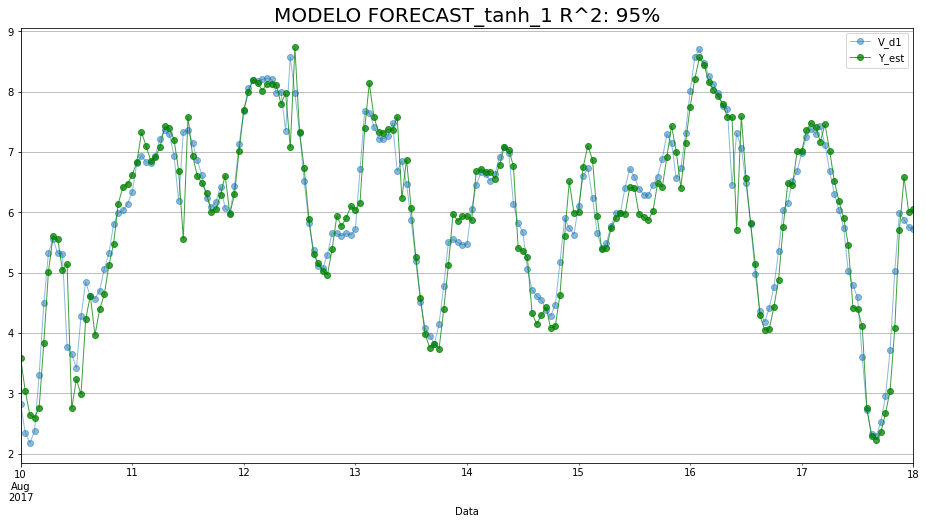

In [21]:
output_file = '../../../../PrevisaoVento/Data/process/cenario1/predicao_cenario1.csv'
df_day.to_csv(output_file, sep=';', encoding='utf-8')

df_grafico = pd.read_csv(output_file, delimiter=';', parse_dates=['Data'])
#df_grafico

df_visao = df_grafico.loc[(df_grafico['Data']>='2017-08-10')] 
df_visao = df_visao.reset_index()
df_visao = df_visao.drop(df_visao[df_visao['Data'] > '2017-08-18'].index)
df_visao = df_visao.reset_index()
df_visao = df_visao.set_index('Data')

fig = pyplot.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
_ = df_visao.plot(y='V_d1', ax=ax, lw=1, marker='o', alpha=0.5)
_ = df_visao.plot(y='Y_est', ax=ax, lw=1, marker='o', alpha=0.75, color='green')
_ = ax.grid()
_ = ax.set_title('MODELO {} R^2: {:.0f}%'.format(best_name, 100.0*model_r2_score), size=20)

### 8.Consulta de Dados de erro com valor maior que variavel

In [ ]:
#df_day.sort_values('rabs', ascending=True)
#index_janine = df_day["V_d1"] > 10
#df_day.loc[index_janine,["Y_est","V_d1","residual"]]